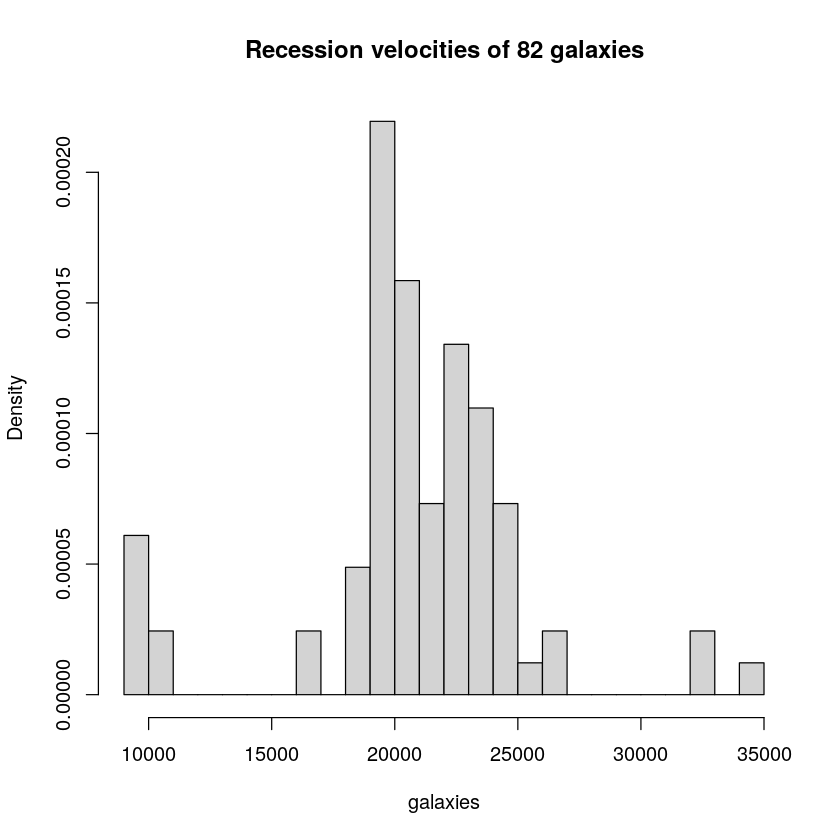

In [1]:
data(galaxies, package="MASS")
hist(galaxies, freq=FALSE, breaks=18, main="Recession velocities of 82 galaxies")

In [2]:
xxx <- c(galaxies, package="MASS")
xxx

"9172"  "9350"  "9483"  "9558"  "9775" "10227" "10406" "16084" "16170" "18419" 
                                                                                
"18552" "18600" "18927" "19052" "19070" "19330" "19343" "19349" "19440" "19473" 
                                                                                
"19529" "19541" "19547" "19663" "19846" "19856" "19863" "19914" "19918" "19973" 
                                                                                
"19989" "20166" "20175" "20179" "20196" "20215" "20221" "20415" "20629" "20795" 
                                                                                
"20821" "20846" "20875" "20986" "21137" "21492" "21701" "21814" "21921" "21960" 
                                                                                
"22185" "22209" "22242" "22249" "22314" "22374" "22495" "22746" "22747" "22888" 
                                                                                
"22914" "23206" "23241" "23263" "23484" "23538" "23542" "23666" "23706" "23711" 
                                                                                
"24129" "24285" "24289" "24366" "24717" "24990" "25633" "26690" "26995" "32065" 
                package 
"32789" "34279"  "MASS"

[1] 6.367930 6.774852 6.270648 7.345875 6.479722 8.616303 8.232116 7.247693
  [9] 9.118987 4.949540 7.817943 8.643334 5.730197 6.246068 7.023189 6.961836
 [17] 6.982315 8.808045 7.809631 5.771628 5.973911 8.984829 7.404754 6.751230
 [25] 6.489053 5.661188 5.701647 6.699266 5.904053 7.489390 6.908235 7.883141
 [33] 8.302692 8.181908 6.759070 6.523327 6.476480 6.543451 5.271152 8.139919
 [41] 5.661814 8.752902 8.392405 7.098772 6.307114 8.347389 5.997372 7.846766
 [49] 6.447797 5.452582 6.224756 7.627169 7.828866 9.337977 6.107646 6.632120
 [57] 7.550167 6.990395 8.226183 8.009107 8.008495 7.293269 8.295801 6.900509
 [65] 7.916136 6.139885 6.790761 8.304463 9.028687 6.109403 7.451195 7.232762
 [73] 8.043448 7.756281 8.960456 7.153654 7.696076 7.602172 7.319143 6.652101
 [81] 6.884128 5.923507 5.998440 5.555050 6.424221 5.814190 9.344116 8.454115
 [89] 8.381822 6.281350 6.575787 8.660850 8.279476 6.121549 6.826361 6.576302
 [97] 6.098389 6.207523 7.760501 7.787747 9.893145 7.426257 8.349889 8.552099
[105] 5.541264 7.569231 8.489754 8.148055 8.125489 7.788017 8.029570 6.059730
[113] 5.971593 8.645064 8.188061 6.904229 6.171930 6.006156 7.091576 5.965429
[121] 8.959707 6.681783 6.950681 8.105211 7.920988 9.197382 8.243829 8.968921
[129] 6.706031 7.616165 7.756264 6.208067 5.638746 6.394092 6.654887

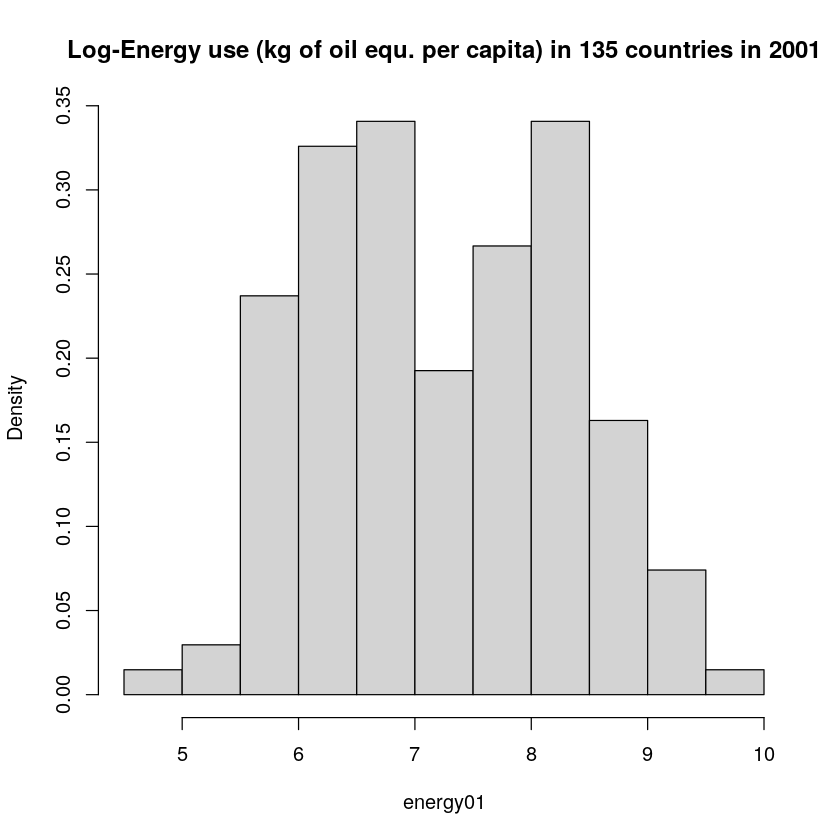

In [3]:
energy.use <-  read.csv("http://www.maths.dur.ac.uk/~dma0je/Data/energy.csv", header=TRUE)
energy01 <- log(energy.use[,c("X2001")])
energy01
hist(energy01,  main="Log-Energy use (kg of oil equ. per capita) in 135 countries in 2001" , 
  freq=FALSE)

In [4]:
estep <- function(dat, p, mu, sigma){         
   n <- length(dat)
   K <- length(mu) 
   W <- matrix(0, n,K)

           
   for (i in 1:n){

        W[i,]<- p/sigma*exp(-1/(2*sigma^2)*(dat[i]-mu)^2)/ 
        sum( p/sigma*exp(-1/(2*sigma^2)*(dat[i]-mu)^2))
   }

  return(W)
 }

In [5]:
mstep <- function(dat, W){                    
   n <- dim(W)[1]
   K <- dim(W)[2]
   
   p  <- apply(W,2,sum)/n

   mu <- apply(W*dat,2,sum)/apply(W,2,sum)
  
   diff <-matrix(0,n, K)
   for (k in 1:K){ 

       diff[,k]<- (dat -mu[k])^2 }
    
   var   <- apply(W*diff,2,sum)/apply(W,2,sum)
   sigma <- sqrt(var)

  return(list("p"=p, "mu"=mu,  "sigma"=sigma))
} 

In [6]:
K = 10
probs= (1:K)/K-1/(2*K)
probs

[1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95

In [7]:
em <- function(dat,K, steps=400){                   
  p     <- rep(1/K,K)
  mu    <- quantile(dat, probs= (1:K)/K-1/(2*K)) 
  sigma <- rep(sd(dat), K)
  
  s <- 1
  while (s <=steps){
    W   <- estep(dat, p, mu, sigma)
    fit <- mstep(dat, W)
    p   <- fit$p
    mu  <- fit$mu
    sigma <-fit$sigma
    s   <- s+1
 }
print(mu)
    fit<- list("p"=p, "mu"=mu, "sigma"=sigma,  "W" =W)
 return(fit)  
 }

In [8]:
fit.em1 <- em(galaxies, K=4)         
fit.em1$mu
fit.em1$sigma
fit.em1$p
fit.em1$W

[1]  9710.143 23185.905 19964.860 33044.335


[1]  9710.143 23185.905 19964.860 33044.335

[1]  422.5107 1633.3574 1385.2894  921.7177

[1] 0.08536585 0.39123845 0.48681039 0.03658531

1.000000e+00,2.762370e-16,2.580457e-13,9.612998e-147
1.000000e+00,4.469672e-16,4.450253e-13,8.963571e-145
1.000000e+00,7.134795e-16,7.427961e-13,2.910094e-143
1.000000e+00,9.674334e-16,1.031672e-12,2.143895e-142
1.000000e+00,2.755200e-15,3.135064e-12,7.970066e-140
1.000000e+00,5.371987e-14,6.843936e-11,3.513314e-134
1.000000e+00,2.339856e-13,3.091779e-10,7.752901e-132
1.108830e-48,2.699828e-03,9.973002e-01,1.707088e-73
4.241851e-50,2.853627e-03,9.971464e-01,7.965815e-73
5.819460e-93,1.764696e-02,9.823530e-01,4.394540e-56
7.583758e-96,2.008313e-02,9.799169e-01,3.865018e-55


In [9]:
fit.em2 <- em(energy01, K=2) 
fit.em2$mu
fit.em2$sigma
fit.em2$p

[1] 6.321075 8.080906


[1] 6.321075 8.080906

[1] 0.5259982 0.6735426

[1] 0.4769274 0.5230726

In [10]:
plot.mix<- function(dat, p, mu, sigma, breaks=25, dens=TRUE, ngrid=401, ...){
  try<-  hist(dat, breaks=breaks,  plot=FALSE)
  hist(dat, breaks=breaks, freq=FALSE, ylim=c(0, max(try$density)*1.3), 
       col="grey93" , border="grey85",...)
  r <- diff(range(dat))
  grid<- seq(min(dat)-0.15*r, max(dat)+0.15*r, length=ngrid)
  K<- length(p)
  if (length(sigma)==1){
    sigma<-rep(sigma, K)
  }
  grid.mat<- matrix(0, ngrid,K)
  for (j in 1:K){
    grid.mat[,j]<- p[j]*dnorm(grid, mu[j], sigma[j])
  }
  for (j in 1:K){
    lines(grid, grid.mat[,j], col=j+1, lwd=2)
  }
  if (dens){
    lines(grid, apply(grid.mat,1, sum), col=1,lwd=2)
  }   
  invisible()  
}

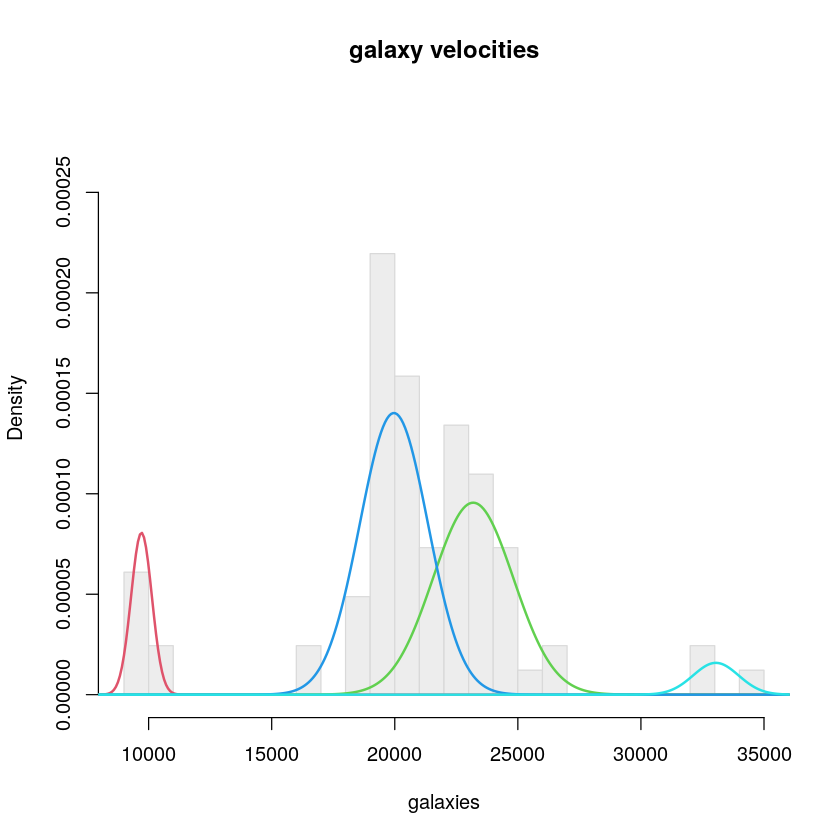

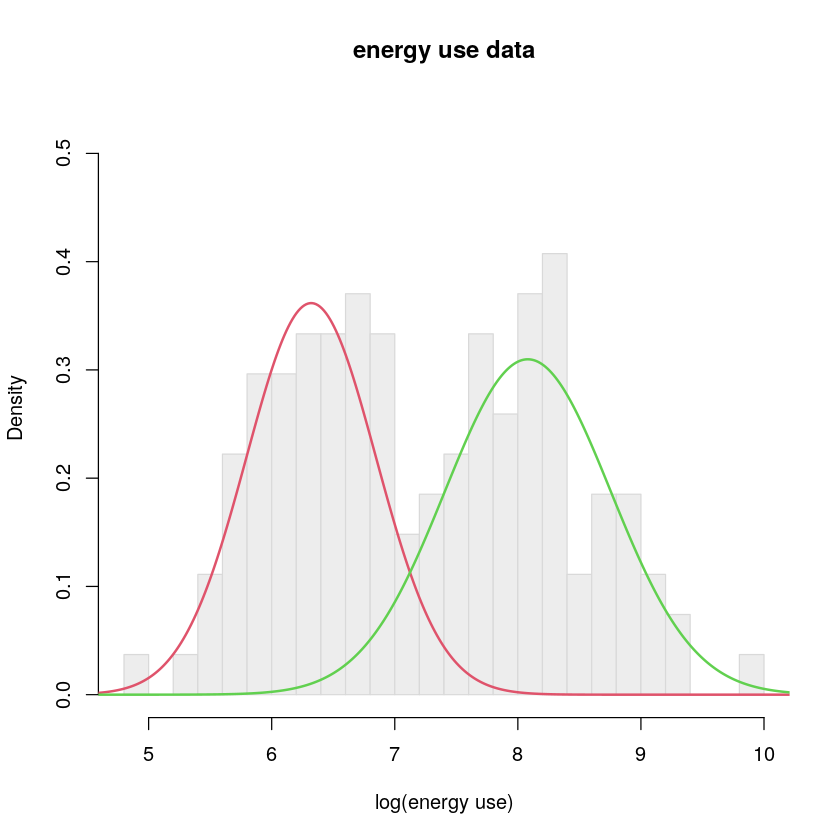

In [11]:
plot.mix(galaxies, fit.em1$p, fit.em1$mu, fit.em1$sigma, 
 main="galaxy velocities", xlab="galaxies",  dens=FALSE)  

plot.mix(energy01, fit.em2$p, fit.em2$mu, fit.em2$sigma,  
 main="energy use data", xlab="log(energy use)",  dens=FALSE) 

In [12]:
round(fit.em1$W[1:12,], digits=4)

1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
0,0.0027,0.9973,0
0,0.0029,0.9971,0
0,0.0176,0.9824,0
0,0.0201,0.9799,0


In [13]:
round(fit.em2$W[1:9,], digits=4) 

0.9672,0.0328
0.8406,0.1594
0.9773,0.0227
0.2409,0.7591
0.9496,0.0504
0.0001,0.9999
0.0016,0.9984
0.3471,0.6529
0.0000,1.0000


In [14]:
gauss.mix.sim<-function(n, p, mu, sigma){          
   x <- runif(n)
   sim <- rep(0,n)
   cp <- cumsum(p)
   for (i in 1:n){
       k <-1
       while (x[i]>cp[k]){
           k<-k+1
       }    
       sim[i] <- rnorm(1,mu[k],sigma[k])
   }
   return(sim)
}

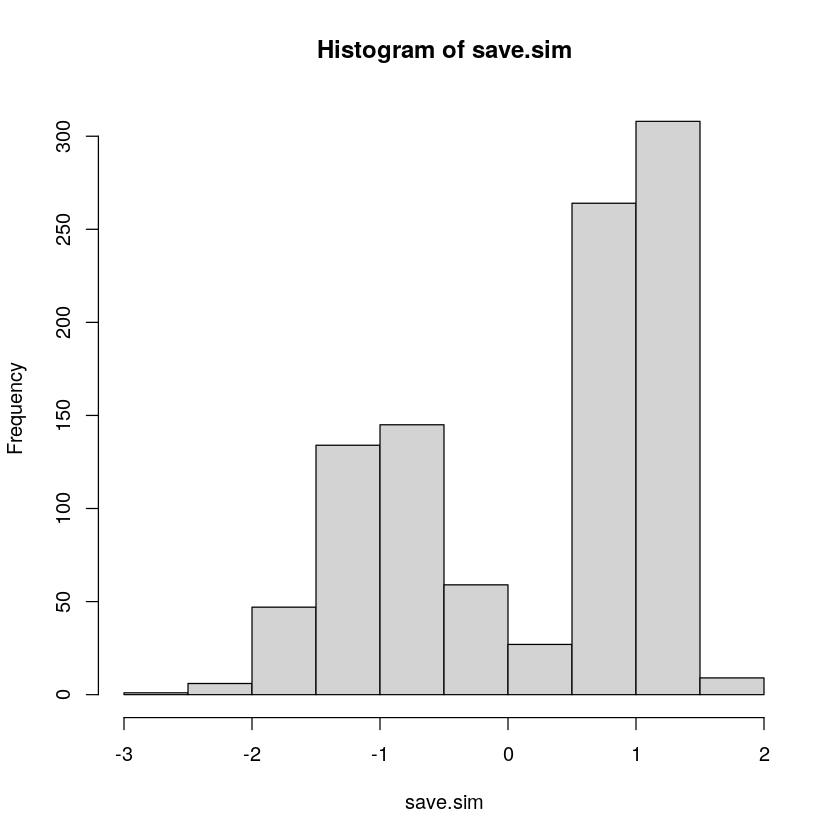

In [15]:
save.sim <- gauss.mix.sim(1000,c(0.4,0.6), 
           c(-1,1), c(1/2,1/4))    
hist(save.sim)  

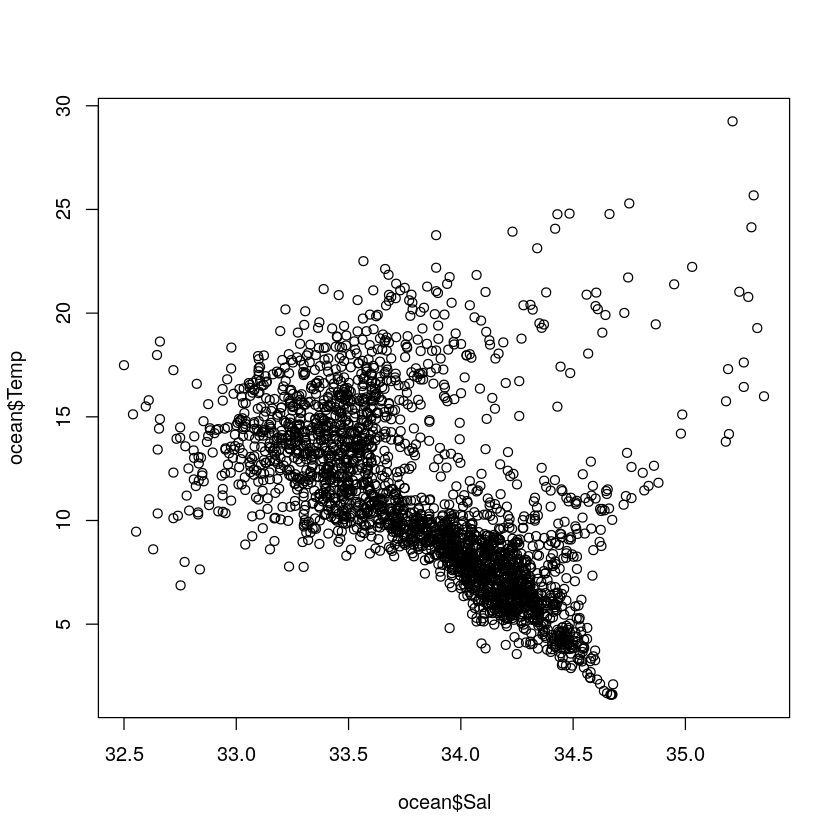

In [16]:
ocean <- read.table("http://www.maths.dur.ac.uk/~dma0je/Data/ocean.dat", header=TRUE, sep=",")
plot(ocean$Sal, ocean$Temp)

Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following objects are masked _by_ ‘.GlobalEnv’:

    em, estep, mstep




---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 7
components: 

 log-likelihood    n df       BIC      ICL
      -6918.938 2500 41 -14158.66 -15300.5

Clustering table:
  1   2   3   4   5   6   7 
142 743 774 308 370  62 101 

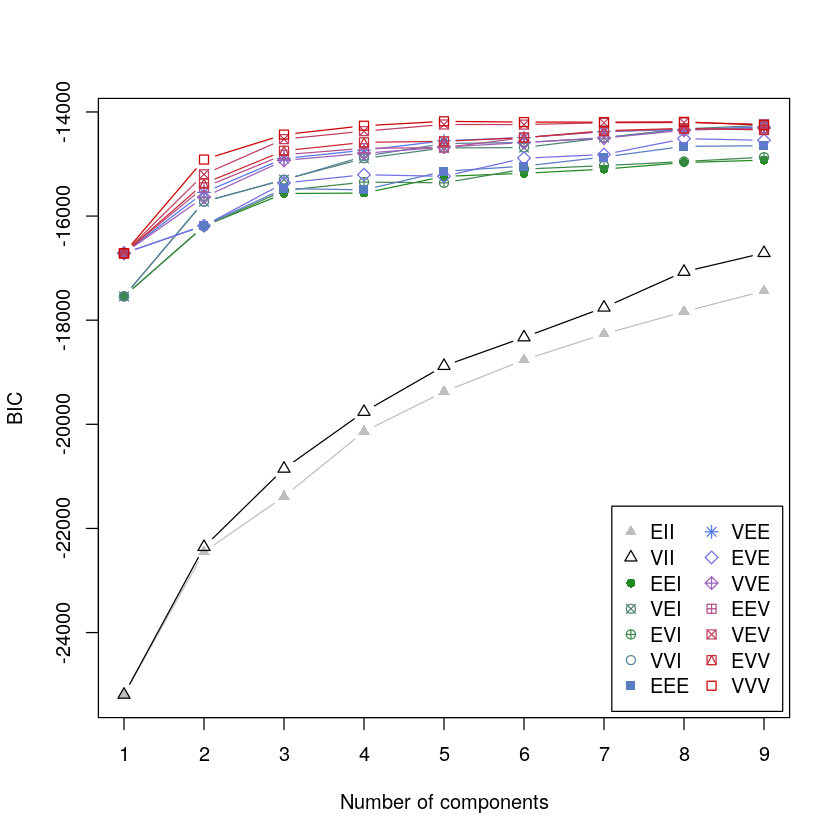

In [17]:
require(mclust)
set.seed(105)
ocean.fit <- Mclust(cbind(ocean$Sal, ocean$Temp))
summary(Mclust(cbind(ocean$Sal, ocean$Temp)))
plot(ocean.fit, what="BIC")



In [18]:
summary(ocean.fit)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 5
components: 

 log-likelihood    n df       BIC       ICL
      -6976.676 2500 29 -14180.25 -15222.88

Clustering table:
  1   2   3   4   5 
 75 948 837 456 184 

Warning message in mclust2Dplot(data = data[, dimens, drop = FALSE], what = "classification", :
“more symbols needed to show classification ”


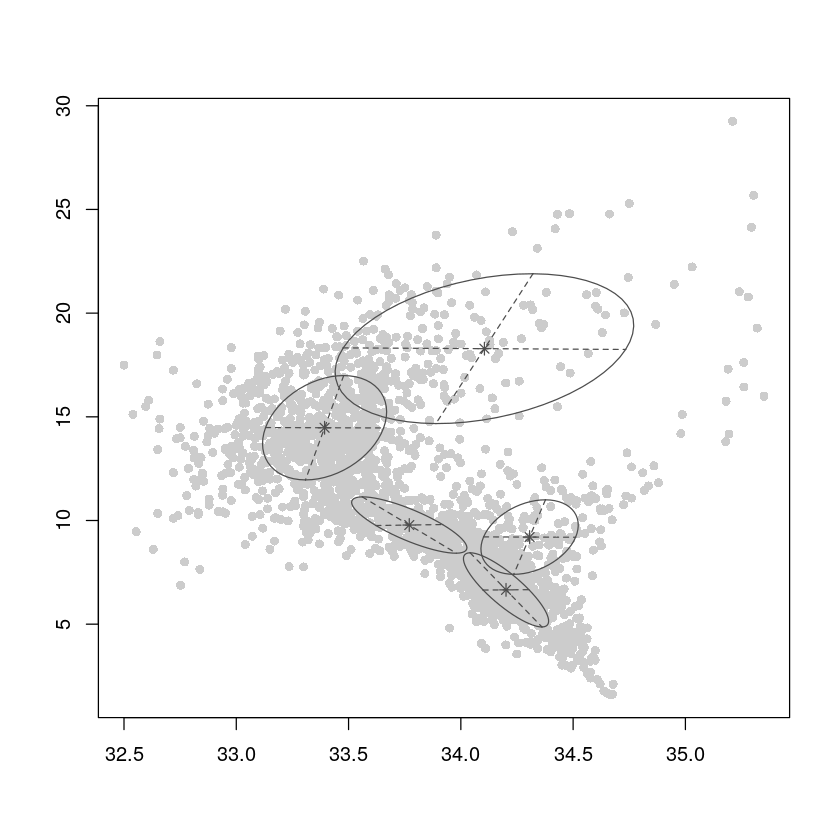

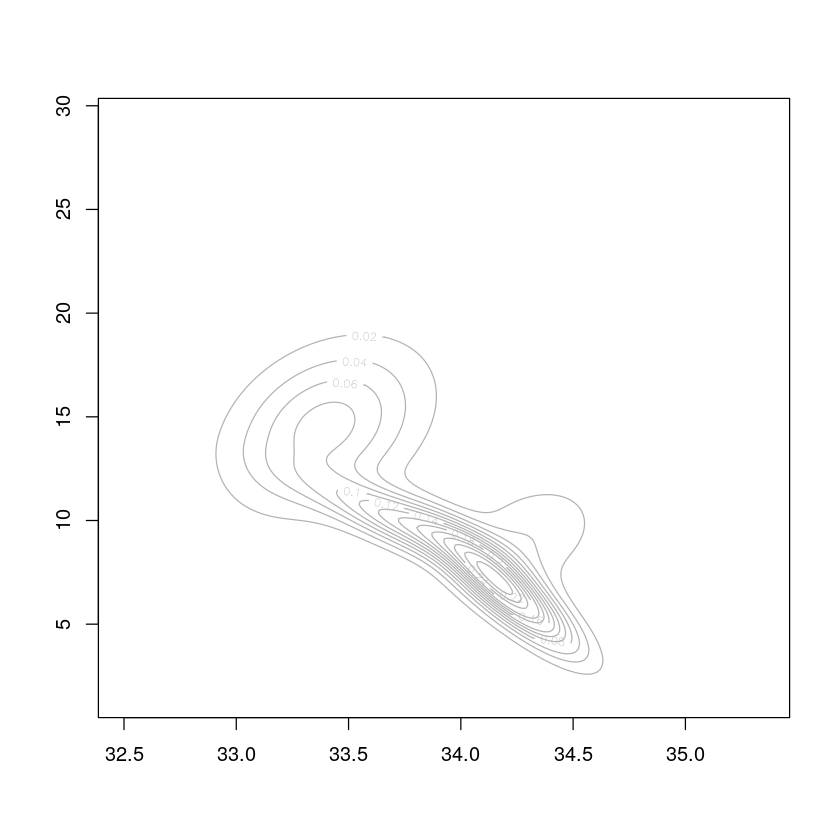

In [19]:
plot(ocean.fit, what="classification",   col="grey80", symbols=0)
plot(ocean.fit, what="density")

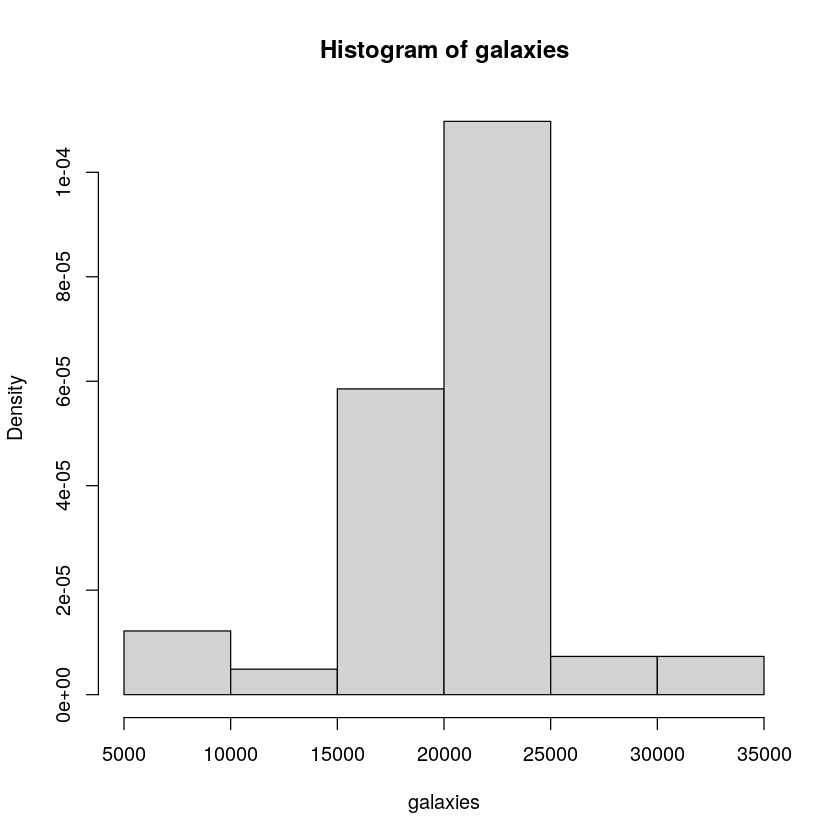

In [20]:
data(galaxies, package="MASS")
hist(galaxies, freq=FALSE)

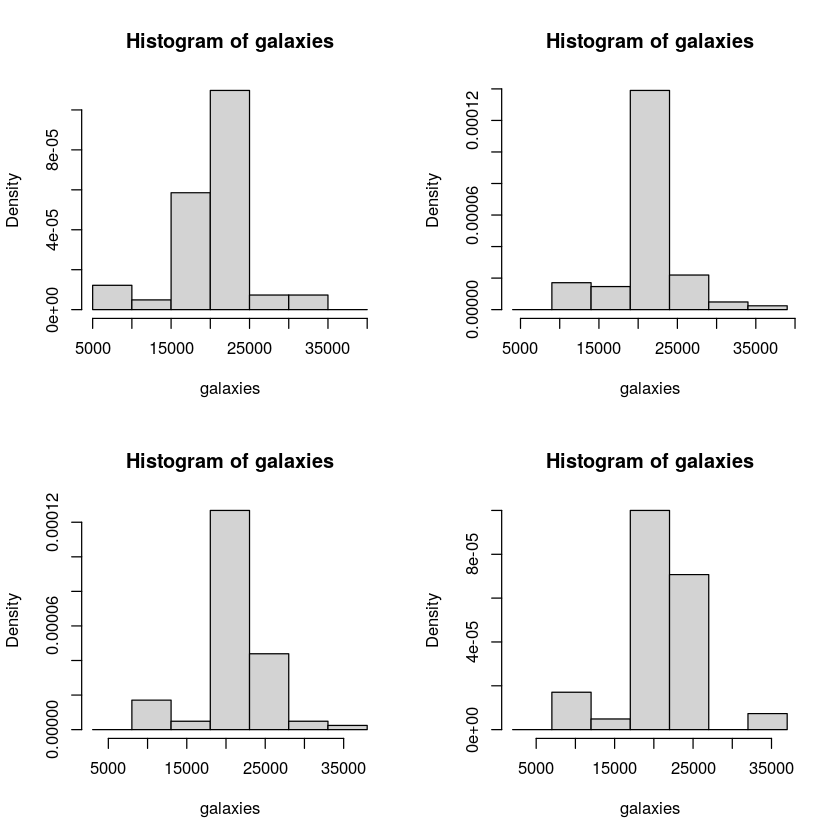

In [21]:
par(mfrow=c(2,2))
hist(galaxies, freq=FALSE, breaks=seq(5000, 40000, by=5000))
hist(galaxies, freq=FALSE, breaks=seq(4000, 39000, by=5000))
hist(galaxies, freq=FALSE, breaks=seq(3000, 38000, by=5000))     
hist(galaxies, freq=FALSE, breaks=seq(2000, 37000, by=5000))

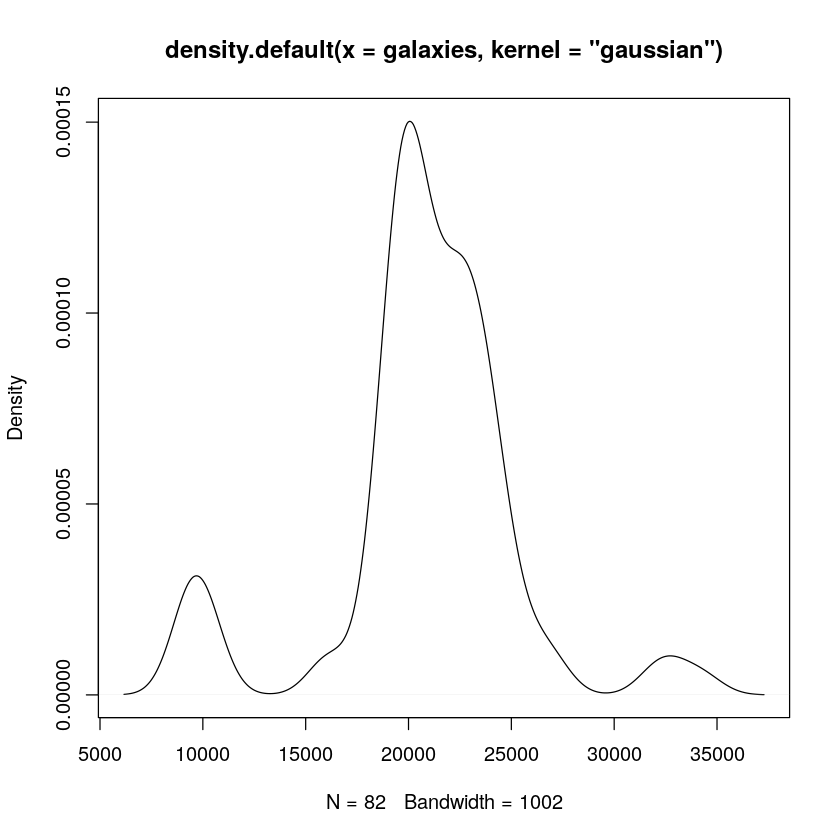

In [22]:
plot(density(galaxies, kernel="gaussian"))

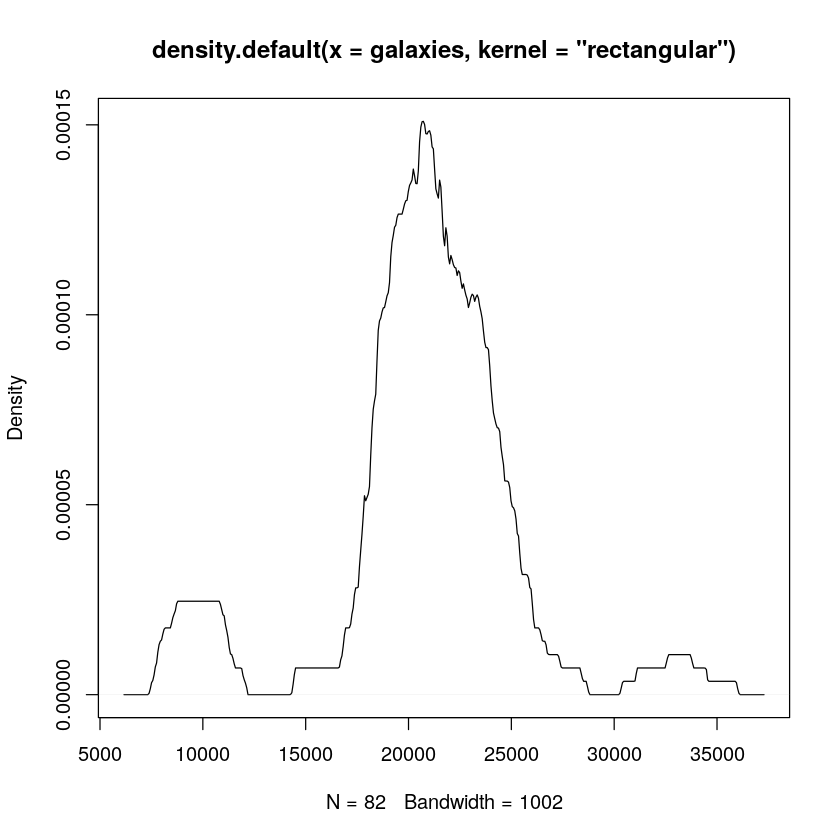

In [23]:
plot(density(galaxies,kernel="rectangular"))

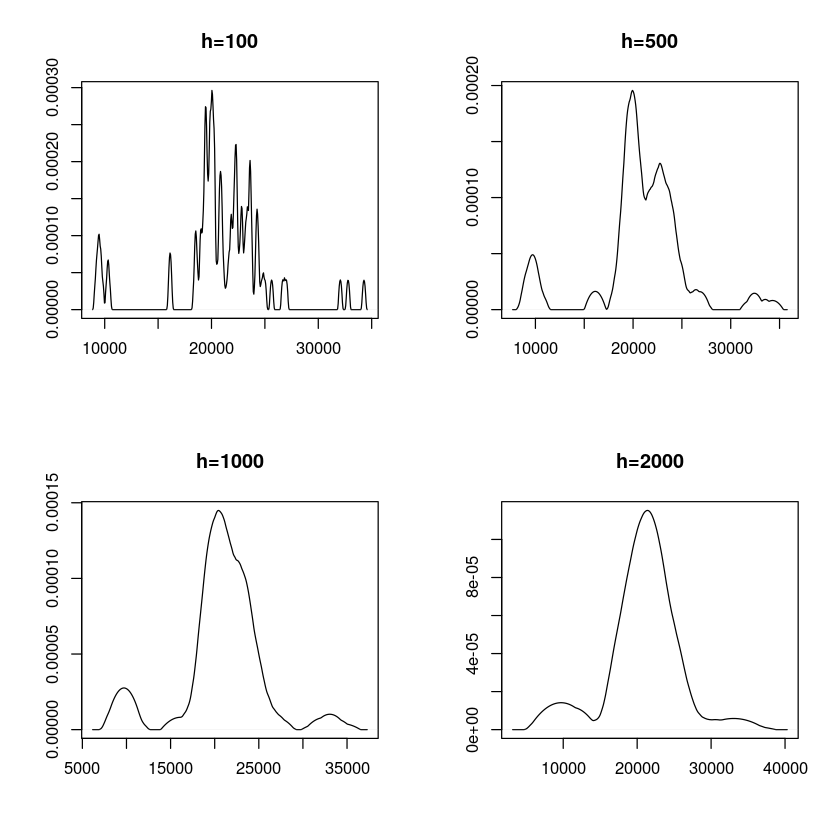

In [24]:
par(mfrow=c(2,2))

plot(density(galaxies, kernel="epanechnikov",  adjust=0.1),  xlab="",ylab="", main="h=100")
plot(density(galaxies, kernel="epanechnikov", adjust=0.5), xlab="", ylab="", main="h=500")
plot(density(galaxies, kernel="epanechnikov"),  xlab="",ylab="", main="h=1000")
plot(density(galaxies, kernel="epanechnikov", adjust=2), xlab="", ylab="", main="h=2000")

Loading required package: MASS



[1] 1.5 1.5

0.9,0.0
0.0,0.9


[1] 100 100

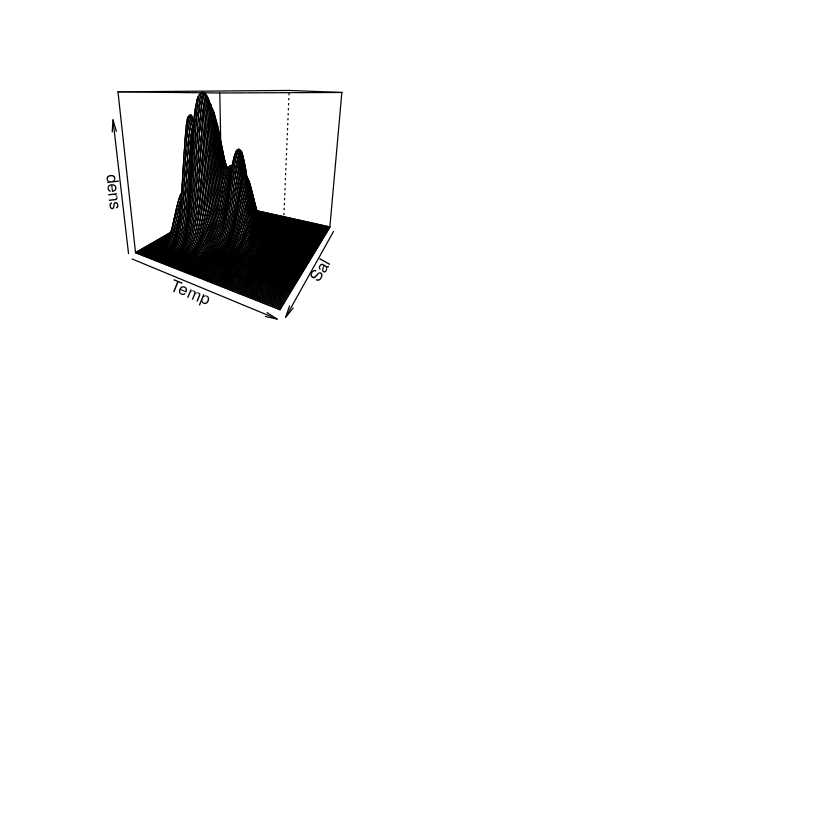

In [25]:
par(mfrow=c(2,2))
require(MASS)
H = diag(0.9,2)
h = rep(1.5, 2)
h
H
ocean.kde<- kde2d(ocean$Sal, ocean$Temp,h = h,n=100, lims=c(31,36,0,30))
dim(ocean.kde$z)
persp(ocean.kde$z, theta=120, xlab="Sal", ylab="Temp", zlab="dens")

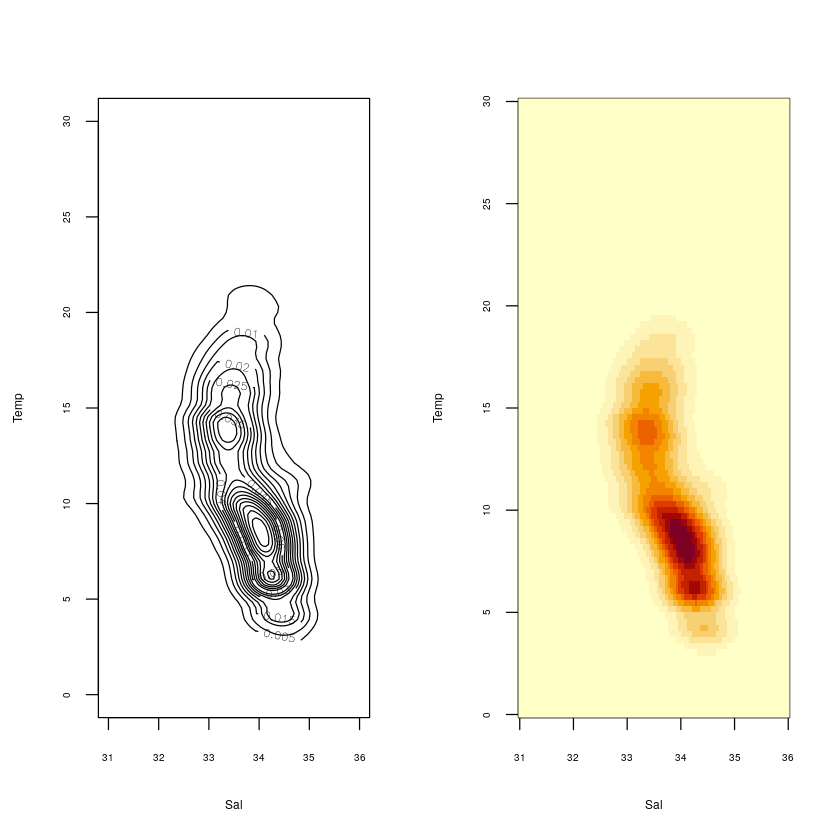

In [26]:
par(mfrow=c(1,2),  cex.lab=0.6, cex.axis=0.5)
contour(ocean.kde$x, ocean.kde$y, ocean.kde$z,xlab="Sal", ylab="Temp", nlevels=20)
image(ocean.kde$x, ocean.kde$y,ocean.kde$z, xlab="Sal", ylab="Temp")